In [2]:
# pip install mediapipe

In [3]:
#pip uninstall opencv-python
# pip install opencv-contrib-python

In [4]:

# pip install tensorflow  

In [5]:
# pip install -U matplotlib

In [6]:
# pip install --upgrade matplotlib

In [97]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [98]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [99]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [100]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [101]:
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_TESSELATION
from mediapipe.python.solutions.hands import HandLandmark
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.pose import PoseLandmark
from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [102]:
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_TESSELATION
from mediapipe.python.solutions.hands import HandLandmark
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.pose import PoseLandmark
from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [103]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

        # Read feed
                ret, frame = cap.read()
        # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        # Draw landmarks
                draw_styled_landmarks(image, results)
        # Show to screen
                cv2.imshow('OpenCV Feed', image)
        # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                 break
        cap.release()
        cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [104]:
# len(results.pose_landmarks.landmark)
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
                                     color=RED_CO

In [105]:
draw_landmarks(frame, results)

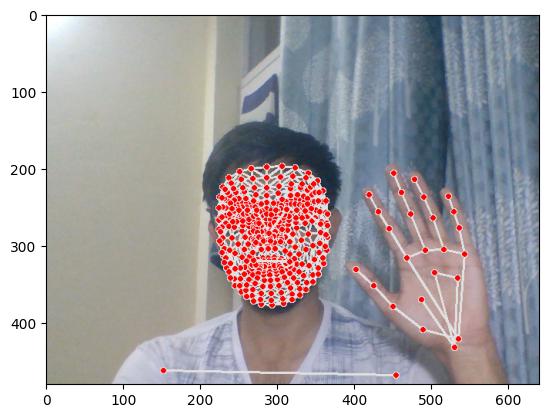

In [106]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [107]:
len(results.pose_landmarks.landmark)

33

In [108]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [109]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [110]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [111]:
lh

array([ 8.36387455e-01,  8.78899336e-01,  2.30210617e-07,  7.64593482e-01,
        8.53653669e-01, -1.76807959e-02,  7.03671098e-01,  7.91173160e-01,
       -2.44855694e-02,  6.64807200e-01,  7.34332025e-01, -3.17861065e-02,
        6.29395962e-01,  6.90693438e-01, -3.90504748e-02,  7.32025266e-01,
        6.59747243e-01, -6.80704979e-05,  6.96442962e-01,  5.80646992e-01,
       -1.57060735e-02,  6.73694015e-01,  5.33361912e-01, -3.22882347e-02,
        6.54876590e-01,  4.88300622e-01, -4.52397354e-02,  7.68843174e-01,
        6.37958407e-01, -6.44298177e-03,  7.40561247e-01,  5.41323066e-01,
       -1.80240944e-02,  7.21681893e-01,  4.81489539e-01, -3.22625265e-02,
        7.05034852e-01,  4.29937631e-01, -4.36251014e-02,  8.07541609e-01,
        6.36106312e-01, -1.73536837e-02,  7.84996450e-01,  5.50277472e-01,
       -2.98890453e-02,  7.66526699e-01,  4.95652646e-01, -4.01149094e-02,
        7.47822762e-01,  4.46910799e-01, -4.84018549e-02,  8.49218011e-01,
        6.49492800e-01, -

In [112]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [113]:
result_test = extract_keypoints(results)

In [114]:
result_test

array([ 0.45275861,  0.5925566 , -1.34583652, ...,  0.        ,
        0.        ,  0.        ])

In [115]:
np.save('0', result_test)

In [116]:
np.load('0.npy')

array([ 0.45275861,  0.5925566 , -1.34583652, ...,  0.        ,
        0.        ,  0.        ])

In [117]:
#lh rh key points,fave and pos
468*3+33*4+21*3+21*3

1662

In [118]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [119]:
for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(0,no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [120]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [121]:
cap.release()
cv2.destroyAllWindows()

In [122]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [123]:
label_map = {label:num for num, label in enumerate(actions)}

In [124]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [125]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [126]:
np.array(sequences).shape


(90, 30, 1662)

In [127]:
np.array(labels).shape


(90,)

In [128]:
X = np.array(sequences)

In [129]:
X

array([[[ 0.61045885,  0.56195521, -0.74250144, ...,  0.30115658,
          0.47660351, -0.04701309],
        [ 0.63433921,  0.54754996, -0.79794794, ...,  0.33557916,
          0.48494583, -0.06390769],
        [ 0.64199173,  0.54489005, -0.81900132, ...,  0.3486588 ,
          0.49019167, -0.05318014],
        ...,
        [ 0.63624305,  0.54753029, -0.75428027, ...,  0.27802408,
          0.3594802 , -0.05208273],
        [ 0.63713855,  0.54935378, -0.83699262, ...,  0.3117449 ,
          0.37253419, -0.04764286],
        [ 0.64035255,  0.55159384, -0.81987506, ...,  0.35522884,
          0.39850205, -0.04178315]],

       [[ 0.640046  ,  0.55279857, -0.80560178, ...,  0.38893694,
          0.42304078, -0.05086702],
        [ 0.64114463,  0.55347931, -0.81705874, ...,  0.39132115,
          0.4313795 , -0.04422362],
        [ 0.64183378,  0.55398762, -0.81692582, ...,  0.39145383,
          0.43199885, -0.04527192],
        ...,
        [ 0.65250176,  0.55742329, -0.84064043, ...,  

In [130]:
X.shape

(90, 30, 1662)

In [131]:
y = to_categorical(labels).astype(int)

In [132]:
#One hot encoded
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [177]:
X_train.shape

(63, 30, 1662)

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [179]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [180]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [181]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [182]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
2/2 [==============================] - 9s 224ms/step - loss: 3.4875 - categorical_accuracy: 0.2540
Epoch 2/300
2/2 [==============================] - 0s 216ms/step - loss: 2.5057 - categorical_accuracy: 0.3810
Epoch 3/300
2/2 [==============================] - 0s 208ms/step - loss: 13.0434 - categorical_accuracy: 0.4127
Epoch 4/300
2/2 [==============================] - 0s 276ms/step - loss: 31.8337 - categorical_accuracy: 0.3968
Epoch 5/300
2/2 [==============================] - 1s 284ms/step - loss: 16.0852 - categorical_accuracy: 0.3968
Epoch 6/300
2/2 [==============================] - 0s 236ms/step - loss: 11.0547 - categorical_accuracy: 0.2857
Epoch 7/300
2/2 [==============================] - 0s 248ms/step - loss: 9.9223 - categorical_accuracy: 0.2222
Epoch 8/300
2/2 [==============================] - 0s 228ms/step - loss: 11.3574 - categorical_accuracy: 0.3333
Epoch 9/300
2/2 [==============================] - 0s 204ms/step - loss: 22.8169 - categorical_accuracy: 0.

In [183]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [215]:
res = model.predict(X_test)

1/1 [==============================] - 0s 180ms/step


In [230]:
actions[np.argmax(res[3])]

'thanks'

In [231]:
actions[np.argmax(y_test[3])]


'thanks'

In [187]:
model.save('action.h5')


In [188]:
model.load_weights('action.h5')

In [189]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [190]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 62ms/step


In [191]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [192]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13,  3],
        [ 6,  5]],

       [[20,  0],
        [ 1,  6]],

       [[12,  6],
        [ 2,  7]]], dtype=int64)

In [193]:
accuracy_score(ytrue, yhat)


0.6666666666666666

In [194]:
from scipy import stats

In [195]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [233]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [232]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
#bi directional lastm 
#gru 
# bi directional gru